In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('crawl-1-results.csv')
df = df[df.numBFSLevels != 3]

In [72]:
df

,sourcePaperID,followedOutLinks,followedInLinks,numBFSLevels,outputEdgeList,numFoundNodes,numFoundEdges,userTime,systemTime,totalTime,maxMemory
0,2035085312,True,True,1,2035085312-true-true-1.txt,40,39,0.509762,0.131993,0.641755,44072
1,2035085312,True,False,1,2035085312-true-false-1.txt,21,20,0.460744,0.085980,0.546724,44920
2,2035085312,False,True,1,2035085312-false-true-1.txt,20,19,0.402400,0.086379,0.488779,44300
3,2523039746,True,True,1,2523039746-true-true-1.txt,15,14,0.452045,0.080128,0.532173,44528
4,2035085312,True,True,1,2035085312-true-true-1.txt,40,39,0.481403,0.080114,0.561517,44916
5,2035085312,True,False,1,2035085312-true-false-1.txt,21,20,0.418235,0.053513,0.471748,44384
6,2035085312,False,True,1,2035085312-false-true-1.txt,20,19,0.376619,0.085105,0.461724,44348
7,2523039746,True,True,1,2523039746-true-true-1.txt,15,14,0.458443,0.097242,0.555685,44944
8,2523039746,True,False,1,2523039746-true-false-1.txt,15,14,0.419663,0.047612,0.467275,44252
9,2523039746,False,True,1,2523039746-false-true-1.txt,1,0,0.397125,0.068677,0.465802,44236


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f6667f0>,
      dtype=object)

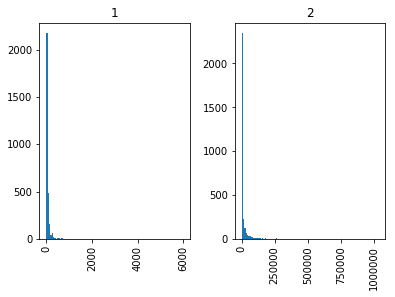

In [16]:
df['numFoundEdges'].hist(by=df['numBFSLevels'], bins=100)

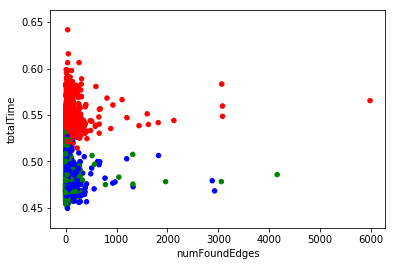

In [59]:
df_1 = df[df['numBFSLevels'] == 1]
colors = np.where(df_1["followedOutLinks"] & df_1["followedInLinks"],'r','-')
colors[~ df_1["followedOutLinks"] & df_1["followedInLinks"]] = 'g'
colors[df_1["followedOutLinks"] & ~ df_1["followedInLinks"]] = 'b'
df_1.plot.scatter(x='numFoundEdges',y='totalTime', c=colors)

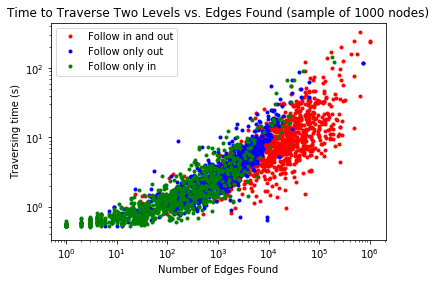

In [193]:
df_2 = df[df['numBFSLevels'] == 2]

fig, ax = plt.subplots()

red = df_2[df_2["followedOutLinks"] & df_2["followedInLinks"]]
ax.loglog(red['numFoundEdges'], red['totalTime'], '.', color='r', label="Follow in and out")

blue = df_2[df_2["followedOutLinks"] & ~df_2["followedInLinks"]]
ax.loglog(blue['numFoundEdges'], blue['totalTime'], '.', color='b', label="Follow only out")

blue = df_2[~df_2["followedOutLinks"] & df_2["followedInLinks"]]
ax.loglog(blue['numFoundEdges'], blue['totalTime'], '.', color='g', label="Follow only in")

plt.title("Time to Traverse Two Levels vs. Edges Found (sample of 1000 nodes)")
ax.set_xlabel("Number of Edges Found")
ax.set_ylabel("Traversing time (s)")

ax.legend()
#ax.grid(True)


fig.savefig('traveraltimevsedges.png')

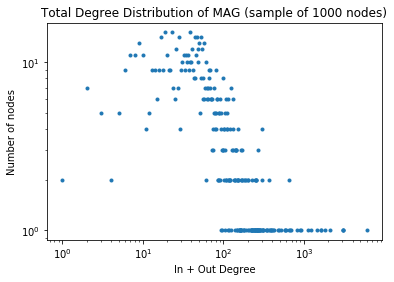

In [191]:
cts = df[(df['numBFSLevels'] == 1) & df["followedOutLinks"] & df["followedInLinks"]]['numFoundEdges'].value_counts().to_frame()
plt.loglog(cts.index, cts['numFoundEdges'], '.')
plt.title("Total Degree Distribution of MAG (sample of 1000 nodes)")
plt.xlabel("In + Out Degree")
plt.ylabel("Number of nodes")
plt.savefig('totaldeg.png')

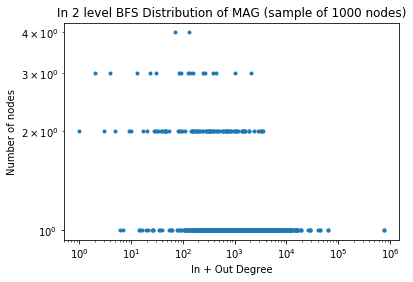

In [187]:
cts = df[(df['numBFSLevels'] == 2) & df["followedOutLinks"] & ~df["followedInLinks"]]['numFoundEdges'].value_counts().to_frame()
plt.loglog(cts.index, cts['numFoundEdges'], '.')
plt.title("In 2 level BFS Distribution of MAG (sample of 1000 nodes)")
plt.xlabel("In + Out Degree")
plt.ylabel("Number of nodes")
plt.savefig('outbfssize.png')

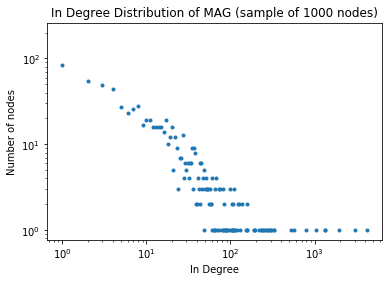

In [159]:
cts = df[(df['numBFSLevels'] == 1) & ~df["followedOutLinks"] & df["followedInLinks"]]['numFoundEdges'].value_counts().to_frame()
plt.loglog(cts.index, cts['numFoundEdges'], '.')
plt.title("In Degree Distribution of MAG (sample of 1000 nodes)")
plt.xlabel("In Degree")
plt.ylabel("Number of nodes")
plt.savefig('indeg.png')

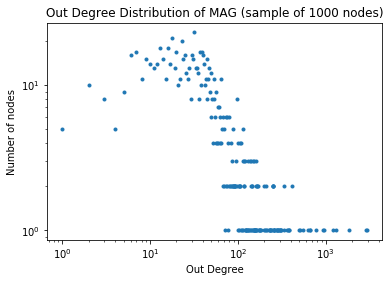

In [190]:
cts = df[(df['numBFSLevels'] == 1) & df["followedOutLinks"] & ~df["followedInLinks"]]['numFoundEdges'].value_counts().to_frame()
plt.loglog(cts.index, cts['numFoundEdges'], '.')
plt.title("Out Degree Distribution of MAG (sample of 1000 nodes)")
plt.xlabel("Out Degree")
plt.ylabel("Number of nodes")
plt.savefig('outdeg.png')

No handles with labels found to put in legend.


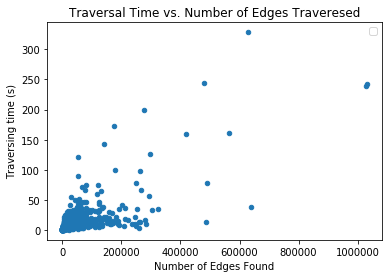

In [78]:
ax = df[(df['numBFSLevels'] == 2) & df["followedOutLinks"] & df["followedInLinks"]].plot.scatter(
    x='numFoundEdges', y='totalTime', title='Traversal Time vs. Number of Edges With')
ax.set_xlabel("Number of Edges Found")
ax.set_ylabel("Traversing time (s)")
ax.legend()
fig = ax.get_figure()
fig.savefig('traveraltimevsedges.png')

In [76]:
df[(df['numBFSLevels'] == 2) & df["followedOutLinks"] & df["followedInLinks"]]

,sourcePaperID,followedOutLinks,followedInLinks,numBFSLevels,outputEdgeList,numFoundNodes,numFoundEdges,userTime,systemTime,totalTime,maxMemory
3004,2035085312,True,True,2,2035085312-true-true-2.txt,2159,2486,4.897845,0.537976,5.435821,45584
3007,2523039746,True,True,2,2523039746-true-true-2.txt,3364,3469,2.044261,0.280991,2.325252,44972
3010,2226360323,True,True,2,2226360323-true-true-2.txt,106752,1031101,219.679854,23.475277,243.155131,516360
3013,267134983,True,True,2,267134983-true-true-2.txt,5769,6340,6.256701,0.732852,6.989553,85012
3016,2072846348,True,True,2,2072846348-true-true-2.txt,3915,4641,1.465351,0.215118,1.680469,44424
3019,2029905935,True,True,2,2029905935-true-true-2.txt,11615,15760,8.802752,1.055640,9.858392,125116
3022,2073475091,True,True,2,2073475091-true-true-2.txt,83821,170557,13.285138,1.305673,14.590811,246364
3025,2157054638,True,True,2,2157054638-true-true-2.txt,3633,6520,5.953229,0.734802,6.688031,71040
3028,2013100056,True,True,2,2013100056-true-true-2.txt,4823,5221,1.823754,0.262698,2.086452,44376
3031,2002016282,True,True,2,2002016282-true-true-2.txt,42943,52749,8.322601,0.991027,9.313628,134732


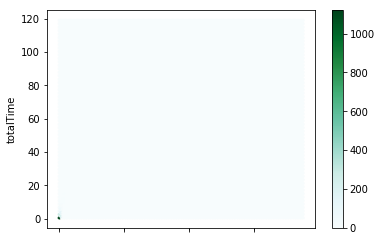

In [41]:
df[df["followedOutLinks"] & ~df["followedInLinks"]].plot.hexbin(x='numFoundEdges',y='totalTime')

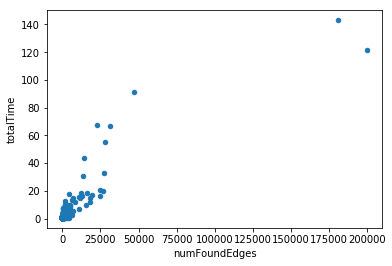

In [40]:
df[~df["followedOutLinks"] & df["followedInLinks"]].plot.scatter(x='numFoundEdges',y='totalTime')

In [29]:
df.plot.scatter(x='levels',y='totalTime',c='DarkBlue')

KeyError: 'levels'